In [1]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [5]:
import tensorflow as tf

In [2]:
def load_coffee_data():
  rng = np.random.default_rng(2)
  X = rng.random(400).reshape(-1,2)
  X[:,1] = X[:,1] * 4 + 11.5
  X[:,0] = X[:,0] * (285-150) + 150
  Y = np.zeros(len(X))
  i=0
  for t,d in X:
    y = -3/(260-175)*t + 21
    if (t > 175 and t < 260 and d > 12 and d < 15 and d<=y ):
      Y[i] = 1
    else:
      Y[i] = 0
    i += 1

  return (X, Y.reshape(-1,1))

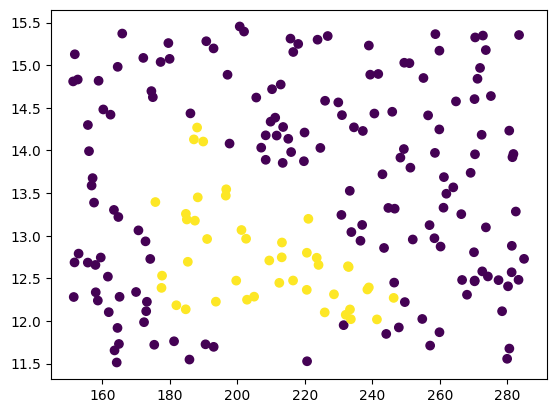

In [4]:
X,Y = load_coffee_data()
plt.scatter(X[:,0],X[:,1],c=Y)

In [6]:
norm_l = tf.keras.layers.Normalization(axis=-1)
norm_l.adapt(X)
Xn = norm_l(X)
Xn.shape

TensorShape([200, 2])

In [7]:
Xt = np.tile(Xn,(1000,1))
Yt= np.tile(Y,(1000,1))
print(Xt.shape, Yt.shape)

(200000, 2) (200000, 1)


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [13]:
tf.random.set_seed(1234)
model=Sequential([tf.keras.Input(shape=(2,)),
                  Dense(units=3,activation='sigmoid',name='l1'),
                  Dense(units=1,activation='sigmoid',name='l2')])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 l1 (Dense)                  (None, 3)                 9         
                                                                 
 l2 (Dense)                  (None, 1)                 4         
                                                                 
Total params: 13 (52.00 Byte)
Trainable params: 13 (52.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
W1, b1 = model.get_layer("l1").get_weights()
W2, b2 = model.get_layer("l2").get_weights()
print(f"W1{W1.shape}:\n", W1, f"\nb1{b1.shape}:", b1)
print(f"W2{W2.shape}:\n", W2, f"\nb2{b2.shape}:", b2)

W1(2, 3):
 [[ 0.6408119  -0.5365145   0.89451087]
 [ 0.6920147  -0.57295465 -0.92996   ]] 
b1(3,): [0. 0. 0.]
W2(3, 1):
 [[-0.8121871 ]
 [-0.18434167]
 [-1.0547013 ]] 
b2(1,): [0.]


In [17]:
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
)

model.fit(
    Xt,Yt,
    epochs=10,
)

Epoch 1/10
6250/6250 [==============================] - 10s 2ms/step - loss: 0.1625
Epoch 2/10
6250/6250 [==============================] - 10s 2ms/step - loss: 0.0602
Epoch 3/10
6250/6250 [==============================] - 9s 1ms/step - loss: 0.0186
Epoch 4/10
6250/6250 [==============================] - 11s 2ms/step - loss: 0.0116
Epoch 5/10
6250/6250 [==============================] - 10s 2ms/step - loss: 0.0080
Epoch 6/10
6250/6250 [==============================] - 10s 2ms/step - loss: 0.0057
Epoch 7/10
6250/6250 [==============================] - 8s 1ms/step - loss: 0.0041
Epoch 8/10
6250/6250 [==============================] - 10s 2ms/step - loss: 0.0029
Epoch 9/10
6250/6250 [==============================] - 9s 2ms/step - loss: 0.0021
Epoch 10/10
6250/6250 [==============================] - 9s 1ms/step - loss: 0.0016


In [18]:
W1, b1 = model.get_layer("l1").get_weights()
W2, b2 = model.get_layer("l2").get_weights()
print(f"W1{W1.shape}:\n", W1, f"\nb1{b1.shape}:", b1)
print(f"W2{W2.shape}:\n", W2, f"\nb2{b2.shape}:", b2)

W1(2, 3):
 [[ 14.41323    -11.344616    -0.1490127 ]
 [ 11.954224    -0.26137835  -8.996324  ]] 
b1(3,): [  1.8211483 -12.360643  -11.240061 ]
W2(3, 1):
 [[-44.791367]
 [-53.09444 ]
 [-48.403934]] 
b2(1,): [27.806599]


In [19]:
X_test = np.array([
    [200,13.9],  # positive example
    [200,17]])   # negative example
X_testn = norm_l(X_test)
predictions = model.predict(X_testn)
print("predictions = \n", predictions)

1/1 [==============================] - 0s 113ms/step
predictions = 
 [[9.9098057e-01]
 [4.1205897e-08]]


In [20]:
yhat = np.zeros_like(predictions)
for i in range(len(predictions)):
    if predictions[i] >= 0.5:
        yhat[i] = 1
    else:
        yhat[i] = 0
print(f"decisions = \n{yhat}")

decisions = 
[[1.]
 [0.]]


In [21]:
yhat = (predictions >= 0.5).astype(int)
print(f"decisions = \n{yhat}")

decisions = 
[[1]
 [0]]
